# HW 10 CLUSTERING BUSINESS

# cluster time trends in NYC businesses: 
# DATA
# Census Business data:
## download census data for businesses by ZIP code. the data is here
http://www.census.gov/econ/cbp/download/
## and it can be downloaded by hand. you can also download it with 3 terminal commands as follows: the data from 1993 through 2001 is different in the format of its path than the data after 2001 (that is why more than one for loop is needed)



$ for ((y=93; y<=99; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

$ for ((y=0; y<=9; y+=1)); do wget ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

$ for ((y=10; y<=15; y+=1)); do wget ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done




# NYC zip codes shape file is here
## http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981

NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

you may need to clean your data: for some NYC zip codes there may be no info
    
sanity check: you should have 20 (Ntimestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)

IMPORTANT: we talked about the importance of "whitening" your data: dividing each feature by its standard deviation. 
Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix.
Whitening your data in time series analysis is in most cases **wrong**: you are modifying your time behaviour. This is because of the strong correlation between features (two consecutive time stamps for the same observation, the same zip code here, are strongly correlated). Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation. As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))




TASKS:
    
    1. get and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in **a few** clusters (as discussed there is no real good, sound way to decide what a good number is here. try a few options, keeping in mind a few is more than a couple, but i recommand you stay within the single digit numbers)
    3. plot the cluster centers (if you used K means those are the means of the clusters). you can plot for example the cluster centers overlayed on each time series (using the alpha channel to control the opacity in the plot may be helpful here).
    4. Use another clustering algorithm (of your choice)
    5. overlay your data on a NYC map: you can use shapefiles for the zip codes and different colors for different clusters
    6. Compare the results of the 2 algorithms
    7. attempt an interpretation. this is dangerous ground: clustering is an exploratory tool so you do not want to jump to conclusions because you see some clusters! but seeing structure in your data can inform your next moves as an investigator. 
    

In [1]:
import pandas as pd
import json
import urllib2 
import numpy as np
import matplotlib.pyplot as plt
url = "https://nycdatastables.s3.amazonaws.com/2013-08-19T18:18:28.877Z/nyc-zip-code-tabulation-areas-polygons.geojson"
request = urllib2.urlopen(url)
nyc = json.load(request)

In [2]:
colors = [
    '#FFB300', # Vivid Yellow
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

In [3]:
#nyc

In [4]:
nyc_zip = []
for department in nyc['features']:
    nyc_zip.append(str(department['properties']["postalCode"]))

In [9]:
# nyc_zip

In [10]:
import zipfile #i am not giving it a name cause i intend to use it only once
t1 = range(1994,2014)
t2 = range(1998,2003)
fname0 = "zbp{0}totals.zip"
biz_zip = set()
for i in t1:
    if i in t2:
        st = str(i)[2:]
        fname = fname0.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = fname0.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    new_zip = set(df.zip).intersection(set(nyc_zip))
    biz_zip = biz_zip.union(new_zip)

In [11]:
biz_zip = sorted(biz_zip)
biz_data_est = pd.DataFrame(np.nan,index=biz_zip,columns=t1)
for i in t1:
    if i in t2:
        st = str(i)[2:]
        fname = fname0.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'ZIP':str})
        df.columns=[u'zip', u'name', u'empflag', u'emp', u'qp1', u'ap', u'est']
    else:
        st = str(i)[2:]
        fname = fname0.format(st)
        zf = zipfile.ZipFile(fname)
        df = pd.read_csv(zf.open(fname.replace('.zip','.txt')),dtype={'zip':str})
    for j in biz_zip:
        if j in list(set(df.zip)):
            biz = df[df.zip==j]
            biz_data_est.loc[j][i]=int(biz.est)

In [12]:
biz_data_est = biz_data_est.dropna()
#print biz_data_est

In [13]:
biz_zip = biz_data_est.index
#print biz_zip

In [14]:
wh_biz_zip = biz_data_est.copy()
for i in range(len(biz_zip)):
    wh_biz_zip.iloc[i] = (wh_biz_zip.iloc[i]-np.mean(wh_biz_zip.iloc[i]))/np.std(wh_biz_zip.iloc[i])
#print wh_biz_zip

### 1. K-mean clusting

In [15]:
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

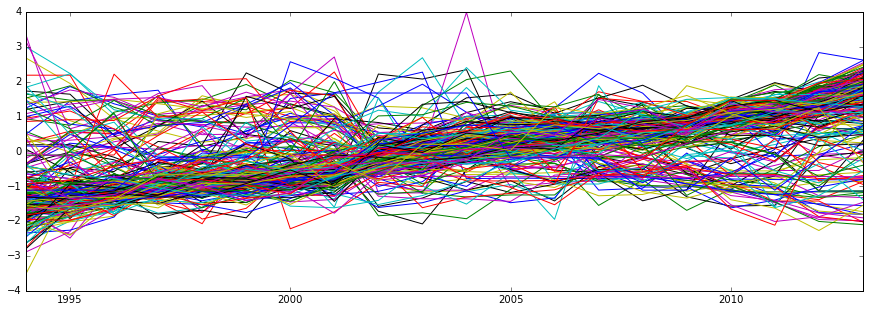

In [16]:
plt.figure(figsize=(15,5))
plt.xlim(1994,2013)
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i].index, wh_biz_zip.iloc[i], '-', alpha=1)

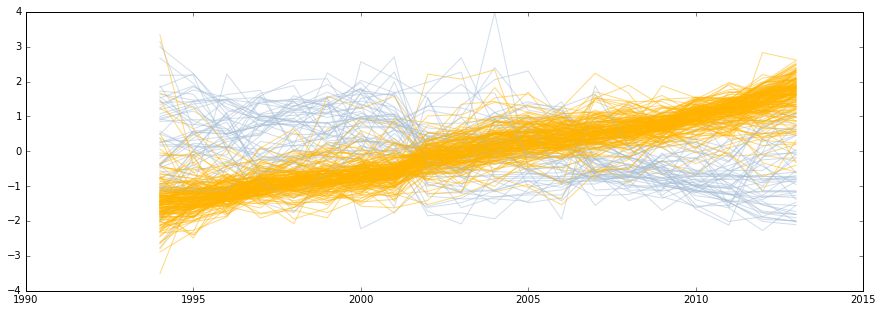

In [17]:
wh_biz_zip = wh_biz_zip.dropna()
est=sklearn.cluster.KMeans(n_clusters = 2,n_init=150)
est.fit(wh_biz_zip.values)
labels=est.labels_
centers = est.cluster_centers_
plt.figure(figsize=(15,5))
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i].index, wh_biz_zip.iloc[i],c=colors[labels[i]], alpha=0.5)

In [18]:
s=[0]*10
for k in range(0,10):
    est=KMeans(n_clusters=k+2,n_init=150)
    est.fit(wh_biz_zip)
    s[k]=silhouette_score(wh_biz_zip, est.labels_)
    print('{0} clusters: {1}'.format(k+2,s[k]))

2 clusters: 0.561611135742
3 clusters: 0.530531696129
4 clusters: 0.42388512067
5 clusters: 0.263869432365
6 clusters: 0.268906235554
7 clusters: 0.167429429799
8 clusters: 0.17180297002
9 clusters: 0.200307704088
10 clusters: 0.175133424418
11 clusters: 0.146317109921


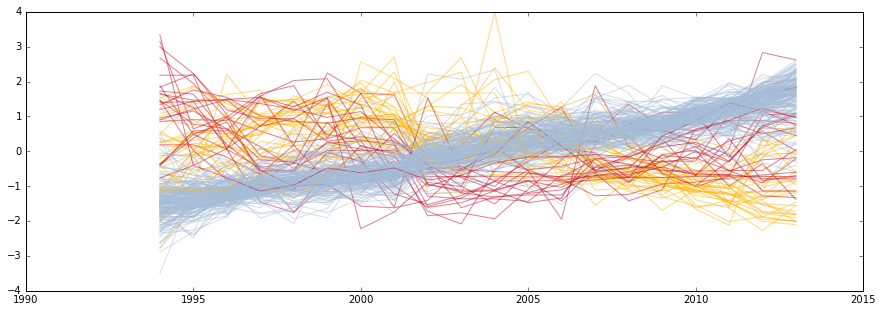

In [19]:
# Choose cluster=3, cluster and visualize
n=3
est=KMeans(n_clusters=n,n_init=150)
est.fit(wh_biz_zip)
labels=est.labels_

plt.figure(figsize=(15,5))
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i].index, wh_biz_zip.iloc[i], c=colors[labels[i]], alpha=0.5)

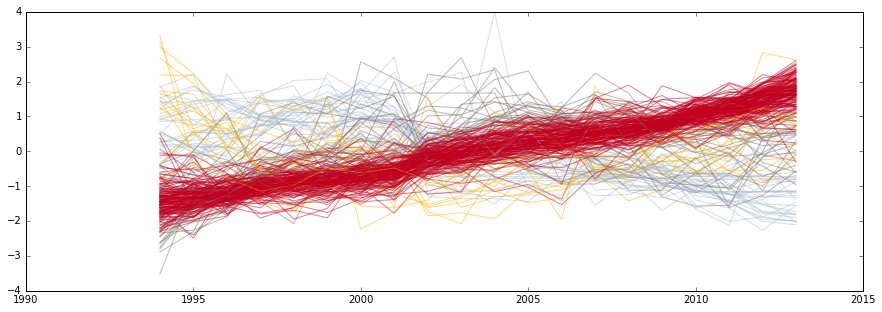

In [20]:
# Choose cluster=4, cluster and visualize
n=4
est=KMeans(n_clusters=n,n_init=150)
est.fit(wh_biz_zip)
labels=est.labels_

plt.figure(figsize=(15,5))
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i].index, wh_biz_zip.iloc[i], c=colors[labels[i]], alpha=0.5)

### 2. Cluster center

In [21]:
n=3
est=KMeans(n_clusters=n,n_init=150)
est.fit(wh_biz_zip)
labels=est.labels_

In [22]:
wtmp = np.zeros((n, len(wh_biz_zip)))
for i in range(len(wh_biz_zip)): wtmp[labels[i]][i] = 1
clmeans = [np.average(wh_biz_zip, axis=0, weights=(wtmp[i])) for i in range(n)]

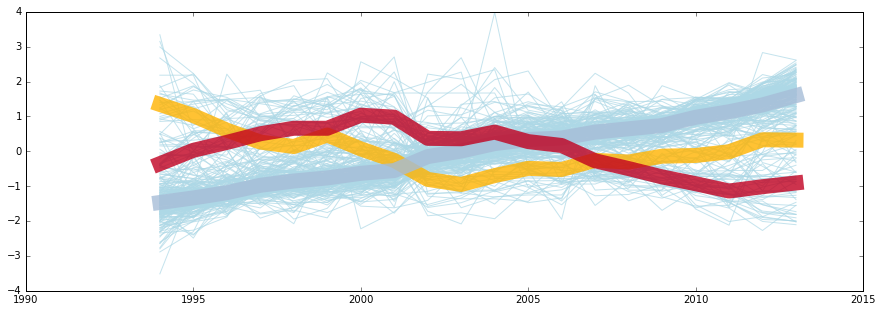

In [23]:
#visualization
plt.figure(figsize=(15,5))
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i],c='lightblue',alpha=0.7)
for i in range(n):
    plt.plot(range(1994,2014),clmeans[i],c=colors[i],linewidth=15,alpha=0.8)

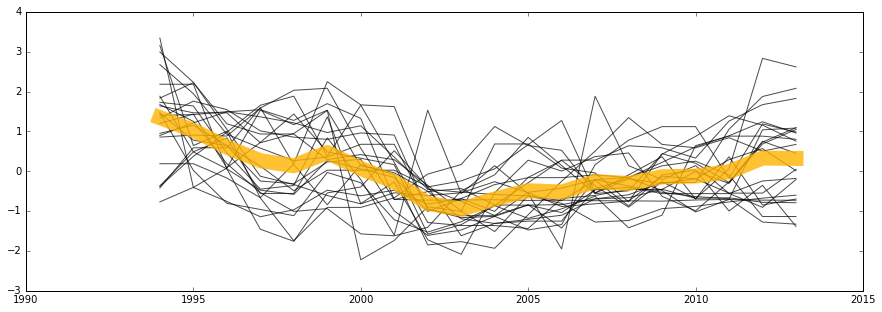

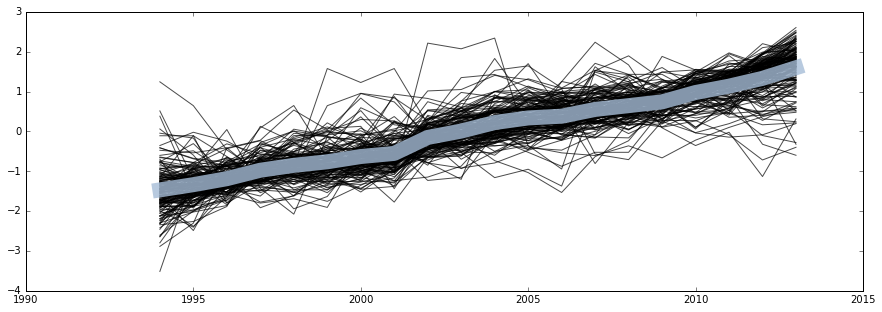

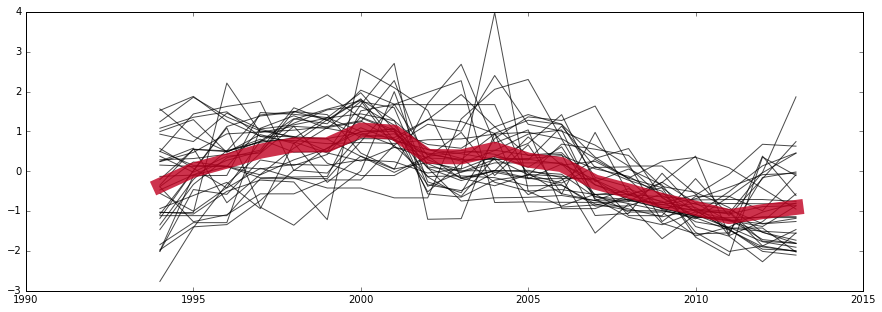

In [24]:
for i in range(n):
    plt.figure(figsize=(15,5))
    for j in range(len(wh_biz_zip)):
        if labels[j] == i:
            plt.plot(wh_biz_zip.iloc[j],c='black',alpha=0.7)
    plt.plot(range(1994,2014),clmeans[i],c=colors[i],linewidth=15,alpha=0.8)

### 3. Use another clustering algorithm

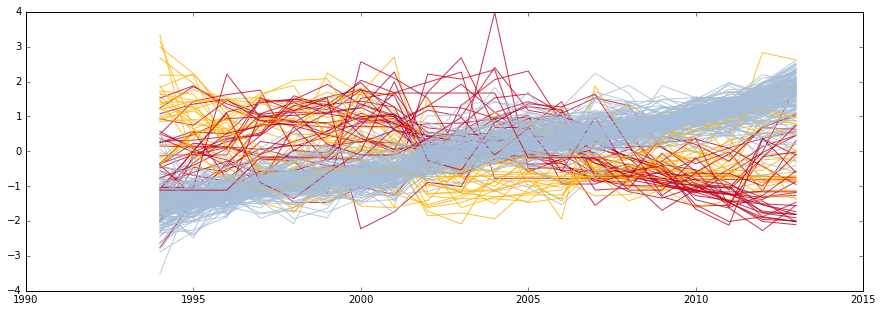

In [25]:
from sklearn.cluster import AgglomerativeClustering
est=AgglomerativeClustering(n_clusters=n)
est.fit(wh_biz_zip)
labels2=est.labels_

plt.figure(figsize=(15,5))
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i],c=colors[labels2[i]],alpha=0.8)

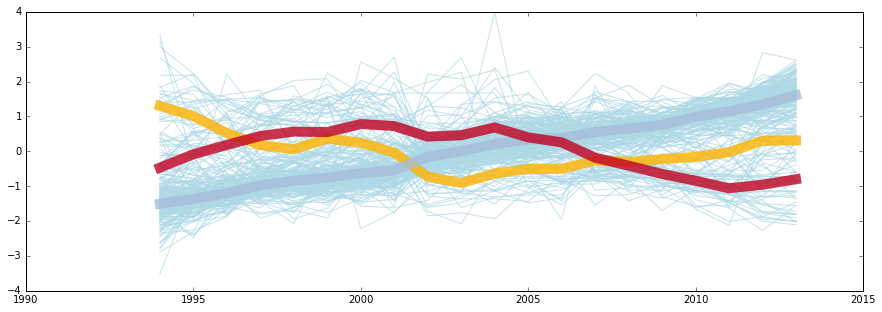

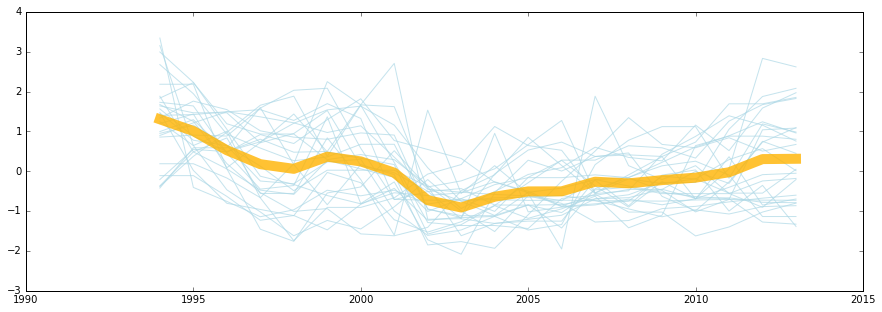

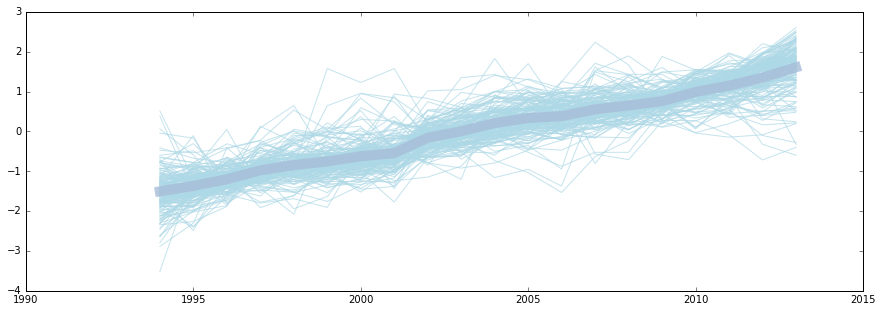

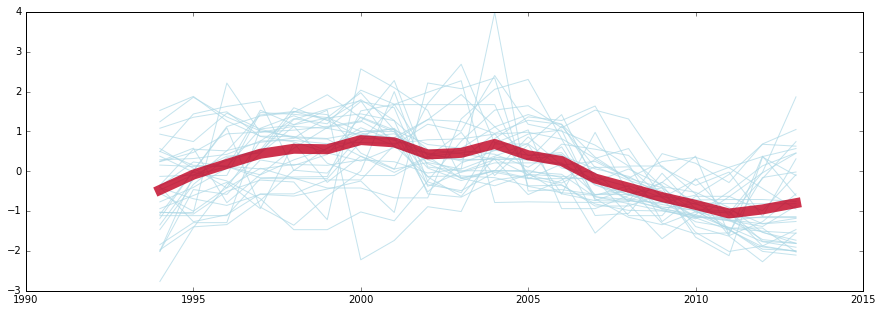

In [26]:
wtmp = np.zeros((n, len(wh_biz_zip)))
for i in range(len(wh_biz_zip)): wtmp[labels2[i]][i] = 1
clmeans = [np.average(wh_biz_zip, axis=0, weights=(wtmp[i])) for i in range(n)]

plt.figure(figsize=(15,5))
for i in range(len(wh_biz_zip)):
    plt.plot(wh_biz_zip.iloc[i],c='lightblue',alpha=0.7)
for i in range(n):
    plt.plot(range(1994,2014),clmeans[i],c=colors[i],linewidth=10,alpha=0.8)
    
for i in range(n):
    plt.figure(figsize=(15,5))
    for j in range(len(wh_biz_zip)):
        if labels2[j] == i:
            plt.plot(wh_biz_zip.iloc[j],c='lightblue',alpha=0.7)
    plt.plot(range(1994,2014),clmeans[i],c=colors[i],linewidth=10,alpha=0.8)

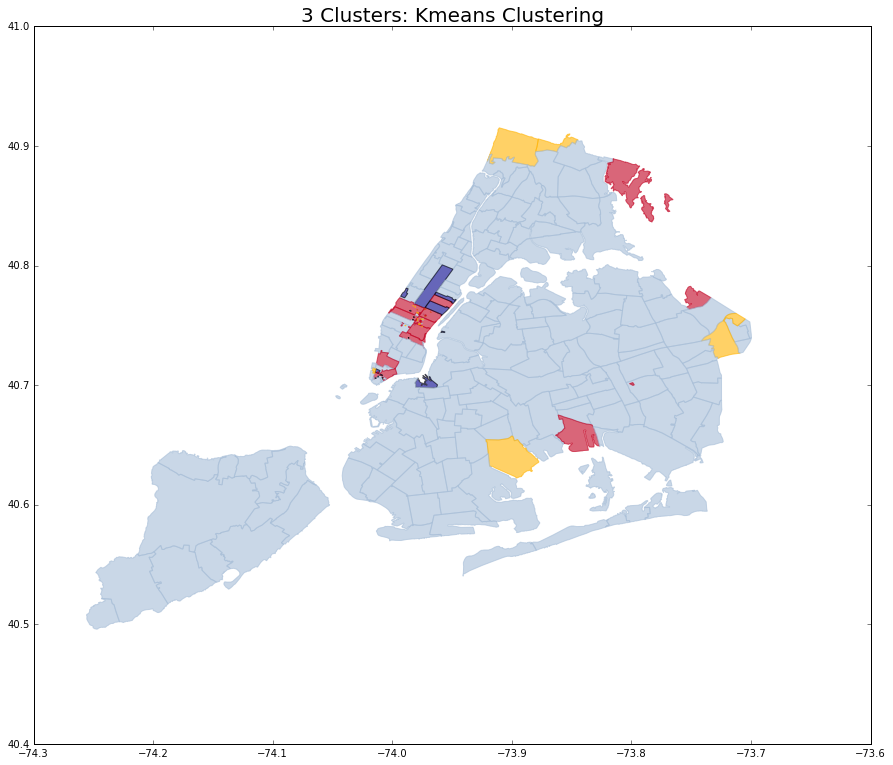

In [27]:
ind = []
from descartes import PolygonPatch
fig = plt.figure(figsize=(15,15)) 
for i in nyc['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    if postcode in list(biz_zip):
        ind = list(biz_zip).index(postcode)
        ax.add_patch(PolygonPatch(poly, fc=colors[labels[ind]], ec=colors[labels[ind]], alpha=0.6, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc='darkblue', ec='black', alpha=0.6, zorder=2 ))
ax.axis('scaled')

plt.title('3 Clusters: Kmeans Clustering', size=20)

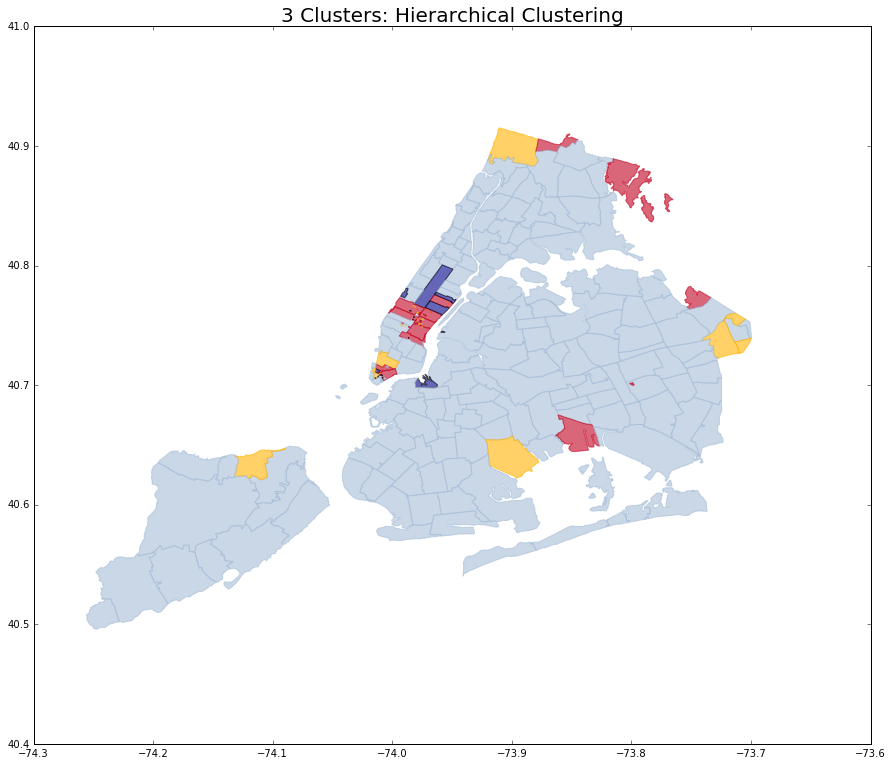

In [28]:
from descartes import PolygonPatch
fig = plt.figure(figsize=(15,15)) 
for i in nyc['features']:
    poly = i['geometry']
    postcode = str(i['properties']['postalCode'])
    ax = fig.gca()
    if postcode in list(biz_zip):
        ind = list(biz_zip).index(postcode)
        ax.add_patch(PolygonPatch(poly, fc=colors[labels2[ind]], ec=colors[labels2[ind]], alpha=0.6, zorder=2 ))
    else:
        ax.add_patch(PolygonPatch(poly, fc='darkblue', ec='black', alpha=0.6, zorder=2 ))
ax.axis('scaled')

plt.title('3 Clusters: Hierarchical Clustering', size=20)